In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('particle_records_tensor_data.csv', header=None, names=['t', 'i', 'j', 'k', 'ux', 'uy', 'uz', 'pk_xx', 'pk_xy', 'pk_xz', 'pk_yx', 'pk_yy', 'pk_yz', 'pk_zx', 'pk_zy', 'pk_zz', 'qk_x', 'qk_y', 'qk_z', 'T'])

In [17]:
data

,t,i,j,k,ux,uy,uz,pk_xx,pk_xy,pk_xz,pk_yx,pk_yy,pk_yz,pk_zx,pk_zy,pk_zz,qk_x,qk_y,qk_z,T
0,1.000000e-08,0,0,0,-4923250.0,-23518300.0,1311060.0,2.554630e+09,-6.595180e+08,-1.608530e+09,-6.595180e+08,2.764830e+09,1.972040e+09,-1.608530e+09,1.972040e+09,2.376560e+09,4.668170e+15,7.565830e+15,-9.392430e+15,139.8060
1,1.000000e-08,0,0,1,2525940.0,5358380.0,-11296500.0,1.638080e+09,-1.423780e+09,7.706020e+08,-1.423780e+09,4.515970e+09,-1.501270e+09,7.706020e+08,-1.501270e+09,1.299240e+09,-3.701620e+16,-1.654210e+16,-3.191160e+16,39.2817
2,1.000000e-08,0,0,2,4679370.0,-1921690.0,4244260.0,3.959560e+09,1.744870e+09,3.919780e+08,1.744870e+09,1.545820e+09,3.361000e+08,3.919780e+08,3.361000e+08,1.745600e+09,-5.280900e+16,-4.480650e+16,2.077700e+16,10.5272
3,1.000000e-08,0,0,3,-6374720.0,9059100.0,-3766840.0,5.911150e+09,1.221950e+09,-1.614950e+09,1.221950e+09,3.664540e+09,-1.911600e+09,-1.614950e+09,-1.911600e+09,3.076170e+09,-2.305720e+17,-1.707980e+17,1.728700e+17,33.0505
4,1.000000e-08,0,0,4,14713600.0,-3558020.0,10419900.0,1.003530e+09,-6.652350e+08,-1.090840e+08,-6.652350e+08,2.064500e+09,4.201500e+08,-1.090840e+08,4.201500e+08,4.070510e+08,-1.468870e+16,3.527280e+16,-4.108320e+14,81.5374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663745,1.000000e-07,54,54,50,-7390850.0,-13000200.0,3835710.0,4.321760e+06,-9.013410e+07,-8.146010e+07,-9.013410e+07,1.879820e+09,1.698920e+09,-8.146010e+07,1.698920e+09,1.535430e+09,0.000000e+00,0.000000e+00,0.000000e+00,57.5435
1663746,1.000000e-07,54,54,51,-11535600.0,47017500.0,5741850.0,1.136060e+09,6.544800e+08,-1.253430e+09,6.544800e+08,3.770440e+08,-7.220970e+08,-1.253430e+09,-7.220970e+08,1.382930e+09,-6.302490e+00,-1.418060e+01,6.302490e+00,573.8090
1663747,1.000000e-07,54,54,52,4817380.0,-1787960.0,11214300.0,2.786300e+08,5.810530e+07,1.037060e+09,5.810530e+07,1.842090e+08,2.663120e+07,1.037060e+09,2.663120e+07,4.068940e+09,-1.679510e+15,-1.594840e+16,1.093730e+16,36.7375
1663748,1.000000e-07,54,54,53,-27918700.0,-10233300.0,-836571.0,2.444350e+08,1.769230e+08,5.660910e+08,1.769230e+08,1.280570e+08,4.097380e+08,5.660910e+08,4.097380e+08,1.311020e+09,3.939050e+00,0.000000e+00,1.575620e+00,213.6380


/tmp/ipykernel_9528/2565650649.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = data[data['t'] == 1e-7][data['k'] == 8]


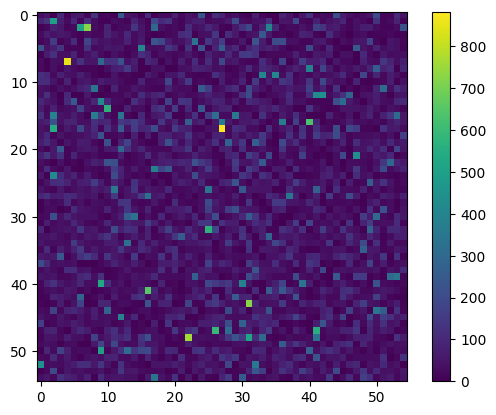

In [25]:
filtered_data = data[data['t'] == 1e-7][data['k'] == 8]
T_values = filtered_data.pivot(index='j', columns='i', values='T')
# plt.contour(T_values.columns, T_values.index, T_values.values, cmap='viridis')
im = plt.imshow(T_values.values, cmap='viridis')
plt.colorbar(im)
plt.show()

<Axes: >

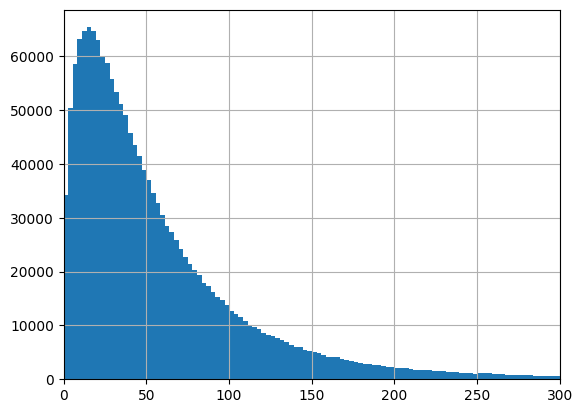

In [31]:
plt.xlim(0, 300)
data['T'].hist(bins=1000)

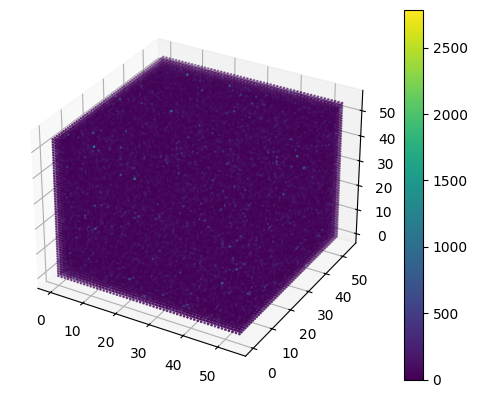

In [20]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(data[data['t'] == 1e-8]['i'], data[data['t'] == 1e-8]['j'], data[data['t'] == 1e-8]['k'], c=data[data['t'] == 1e-8]['T'], cmap='viridis', s=1)
fig.colorbar(sc)